In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 35.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=536ceb839d682b2692452025c927823bc6a9cf5ea17bcce6a47adaa35a436313
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
data=pd.read_excel("/content/sample_data/World_development_mesurement.xlsx")
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [ ]:
country=data.iloc[:,3]
country

0                        Algeria
1                         Angola
2                          Benin
3                       Botswana
4                   Burkina Faso
                  ...           
2699    Turks and Caicos Islands
2700               United States
2701                     Uruguay
2702               Venezuela, RB
2703       Virgin Islands (U.S.)
Name: Country, Length: 2704, dtype: object

In [ ]:
((data.isnull().sum()/len(data)).sort_values())*100

Population Total           0.000000
Country                    0.000000
Number of Records          0.000000
Population Urban           0.961538
Birth Rate                 4.400888
Life Expectancy Male       5.029586
Life Expectancy Female     5.029586
Mobile Phone Usage         6.176036
Internet Usage             6.397929
GDP                        7.766272
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Infant Mortality Rate      9.615385
Health Exp/Capita         11.427515
Health Exp % GDP          11.427515
Tourism Inbound           13.609467
Tourism Outbound          17.418639
CO2 Emissions             21.412722
Lending Interest          30.473373
Energy Usage              33.986686
Days to Start Business    36.464497
Business Tax Rate         47.374260
Hours to do Tax           47.633136
Ease of Business          93.158284
dtype: float64

In [ ]:
data['GDP']=data['GDP'].str.replace('\$|,','', regex=True).astype(np.float64)
data['Health Exp/Capita']=data['Health Exp/Capita'].str.replace('\$|,','', regex=True).astype(np.float64)
data['Business Tax Rate']=data['Business Tax Rate'].str.replace('%','0').astype(np.float64)
data['Tourism Inbound']=data['Tourism Inbound'].str.replace('\$|,','', regex=True).astype(np.float64)
data['Tourism Outbound']=data['Tourism Outbound'].str.replace('\$|,','', regex=True).astype(np.float64)

In [ ]:
data=data.rename(columns={'Birth Rate':'Birth_rate', 'Business Tax Rate':'Business_Tax_Rate', 'CO2 Emissions':'Co2_Emmissions',
       'Days to Start Business':'Days_to_Start_Business', 'Ease of Business':'Ease_of_business', 'Energy Usage':'Energy_Usage',
       'Health Exp % GDP':'Health_Exp_percent_gdp', 'Health Exp/Capita':'Health_exp_capita', 'Hours to do Tax':'Hours_to_tax',
       'Infant Mortality Rate':'Infant_Mortality_Rate', 'Internet Usage':'Internet_Usage', 'Lending Interest':'Lending_Interest',
       'Life Expectancy Female':'Life_Expectancy_Female', 'Life Expectancy Male':'Life_Expectancy_Male', 'Mobile Phone Usage':'Mobile_Phone_Usage',
       'Number of Records':'Number_of_Records', 'Population 0-14':'Population_0_14', 'Population 15-64':'Population_15_64',
       'Population 65+':'Population_65_plus', 'Population Total':'Population_Total', 'Population Urban':'Population_Urban',
       'Tourism Inbound':'Tourism_Inbound', 'Tourism Outbound':'Tourism_Outbound'})

In [ ]:
((data.isnull().sum()/len(data))*100).sort_values(ascending=True)

Population_Total           0.000000
Country                    0.000000
Number_of_Records          0.000000
Population_Urban           0.961538
Birth_rate                 4.400888
Life_Expectancy_Male       5.029586
Life_Expectancy_Female     5.029586
Mobile_Phone_Usage         6.176036
Internet_Usage             6.397929
GDP                        7.766272
Population_0_14            8.136095
Population_15_64           8.136095
Population_65_plus         8.136095
Infant_Mortality_Rate      9.615385
Health_exp_capita         11.427515
Health_Exp_percent_gdp    11.427515
Tourism_Inbound           13.609467
Tourism_Outbound          17.418639
Co2_Emmissions            21.412722
Lending_Interest          30.473373
Energy_Usage              33.986686
Days_to_Start_Business    36.464497
Business_Tax_Rate         47.374260
Hours_to_tax              47.633136
Ease_of_business          93.158284
dtype: float64

In [ ]:
data.Country.value_counts()

Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: Country, Length: 208, dtype: int64

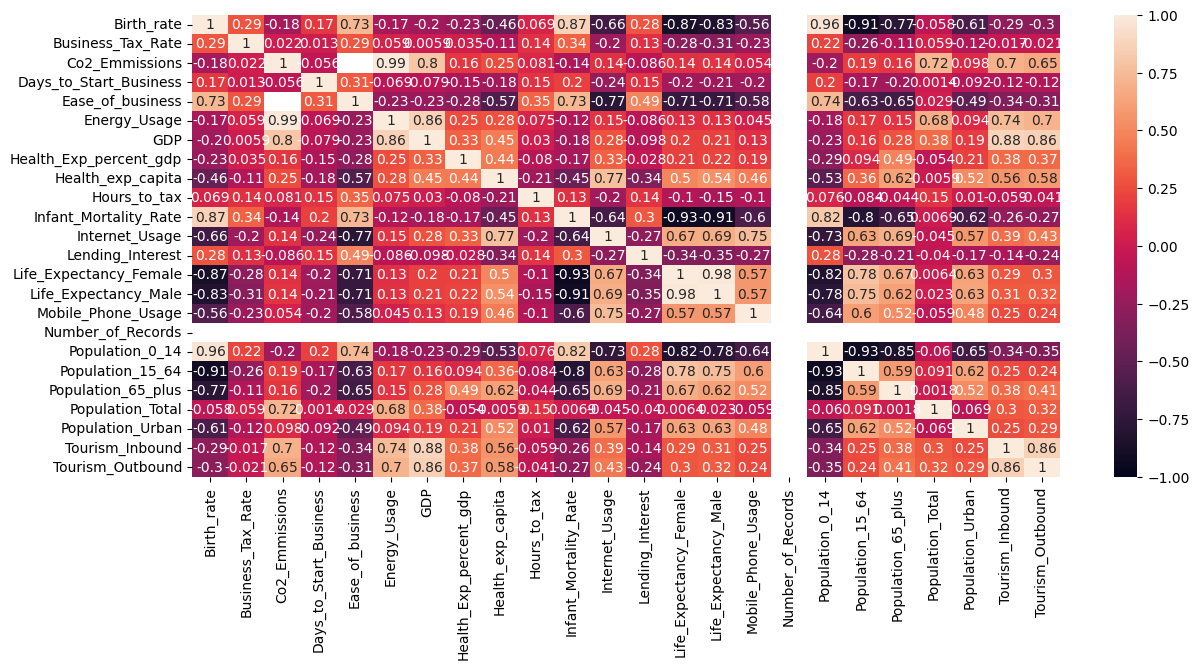

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

In [ ]:
data.drop(['Country','Number_of_Records','Days_to_Start_Business','Business_Tax_Rate','Hours_to_tax','Ease_of_business'],axis=1,inplace=True)

In [ ]:
((data.isnull().sum()/len(data)).sort_values())*100

Population_Total           0.000000
Population_Urban           0.961538
Birth_rate                 4.400888
Life_Expectancy_Male       5.029586
Life_Expectancy_Female     5.029586
Mobile_Phone_Usage         6.176036
Internet_Usage             6.397929
GDP                        7.766272
Population_0_14            8.136095
Population_15_64           8.136095
Population_65_plus         8.136095
Infant_Mortality_Rate      9.615385
Health_exp_capita         11.427515
Health_Exp_percent_gdp    11.427515
Tourism_Inbound           13.609467
Tourism_Outbound          17.418639
Co2_Emmissions            21.412722
Lending_Interest          30.473373
Energy_Usage              33.986686
dtype: float64

In [ ]:
immp=data.copy()

In [ ]:
imput=KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean')
transformed=imput.fit_transform(immp)

In [ ]:
trans_df=pd.DataFrame(transformed,columns=data.columns)
trans_df.head()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
0,0.020,87931.0,26998.0,5.479006e+10,0.035,60.0,0.034,0.0,0.1000,71.0,67.0,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,9542.0,7499.0,9.129595e+09,0.034,22.0,0.128,0.0,1.0320,47.0,44.0,0.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,1617.0,1983.0,2.359122e+09,0.043,15.0,0.090,0.0,0.1102,57.0,53.0,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,4276.0,1836.0,5.788312e+09,0.047,152.0,0.054,0.0,0.1550,52.0,49.0,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,1041.0,16080.6,2.610959e+09,0.051,12.0,0.096,0.0,0.1026,52.0,49.0,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


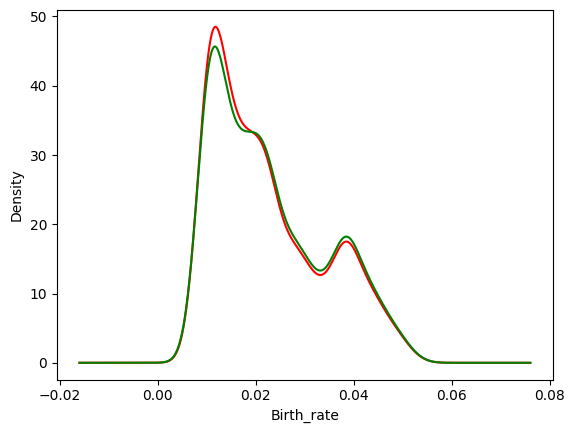

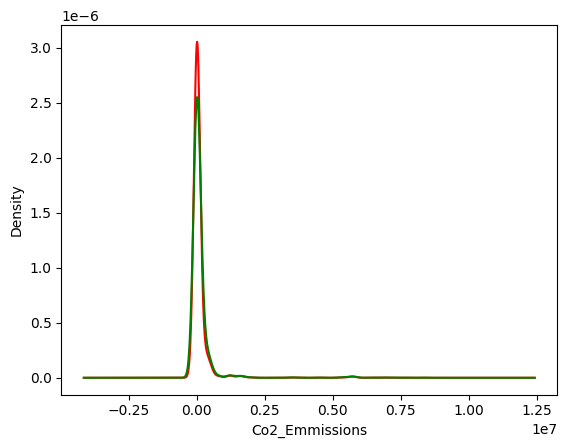

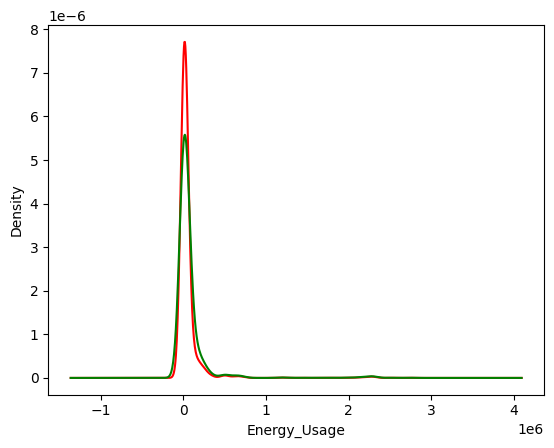

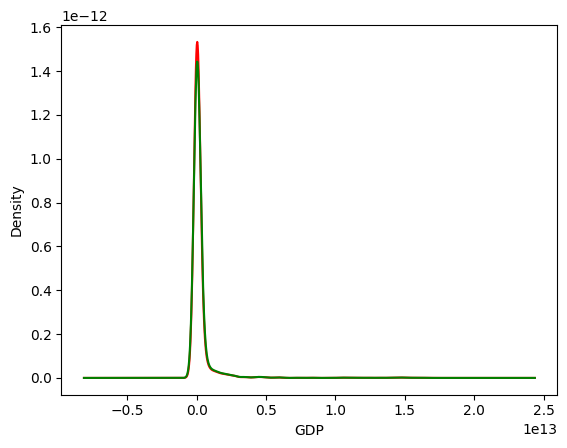

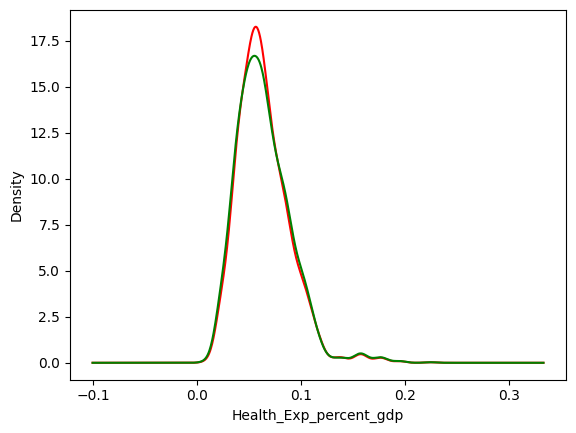

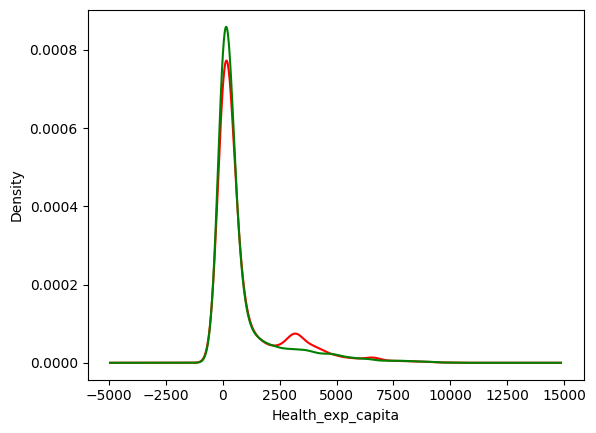

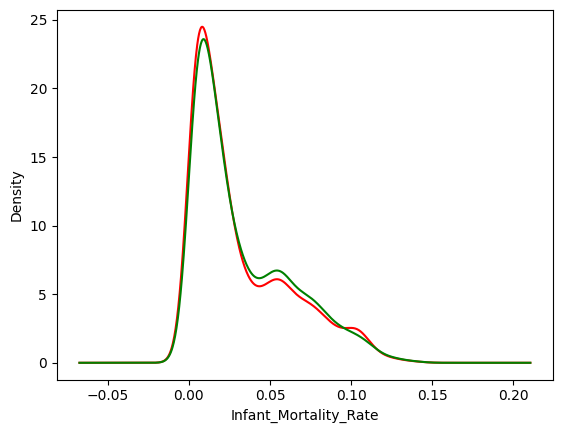

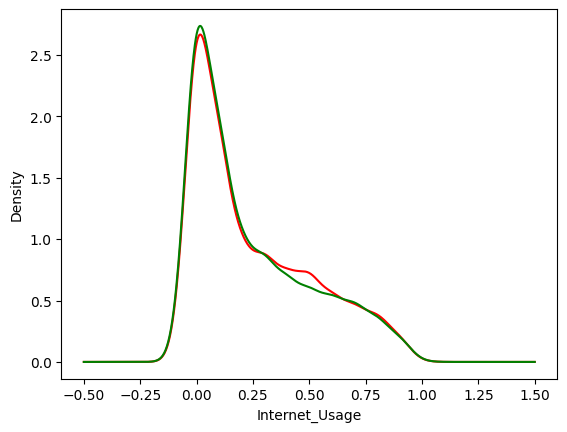

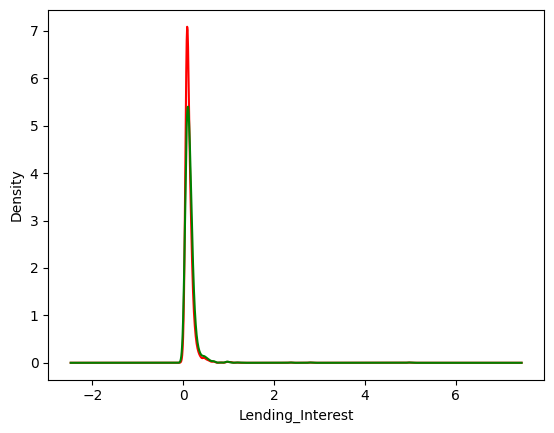

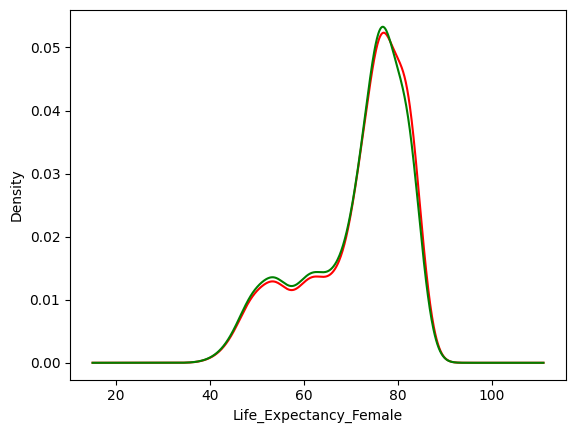

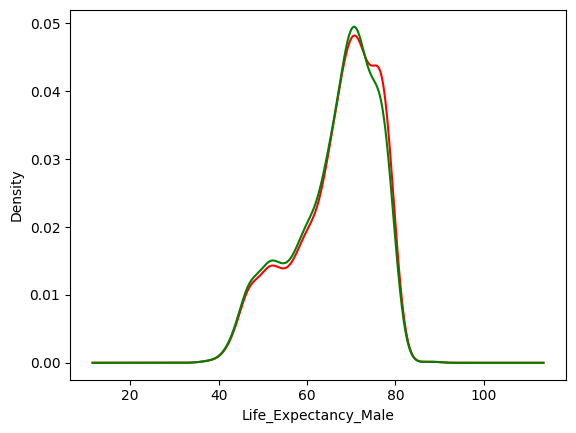

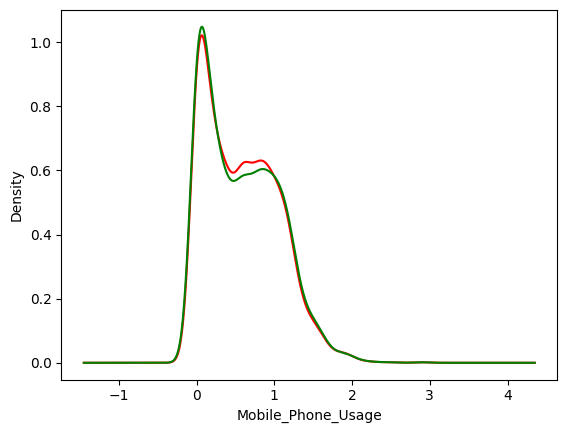

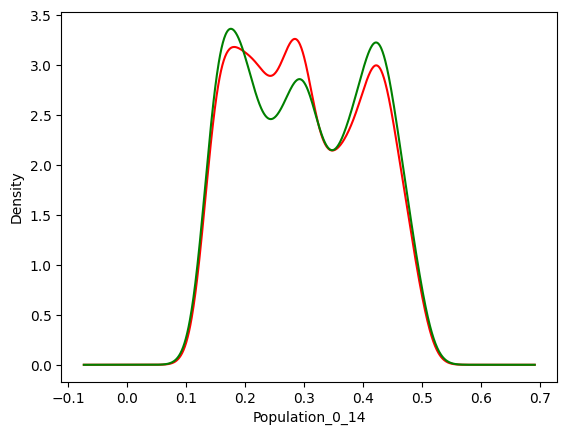

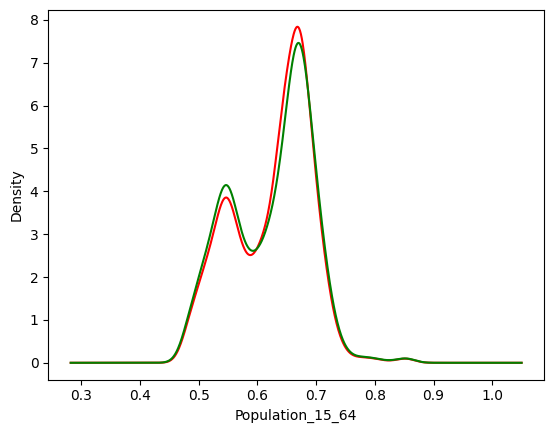

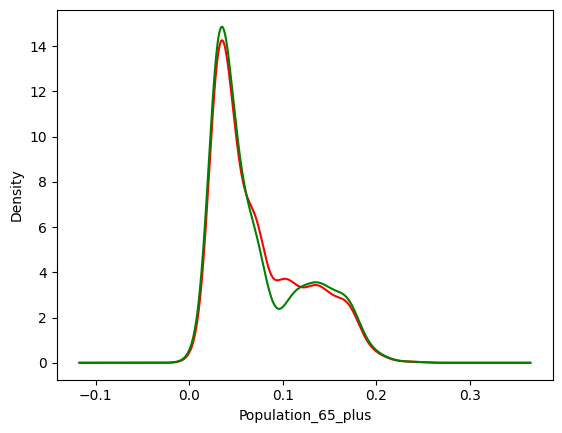

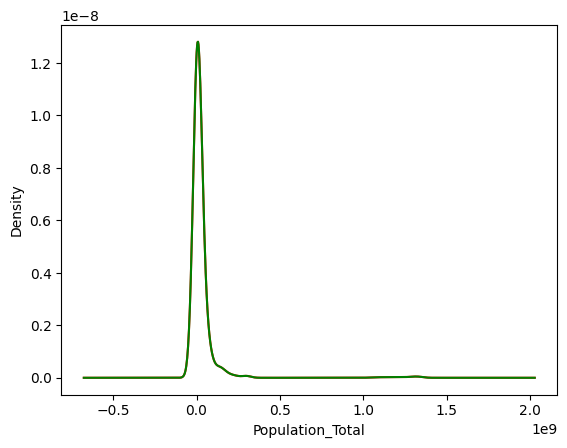

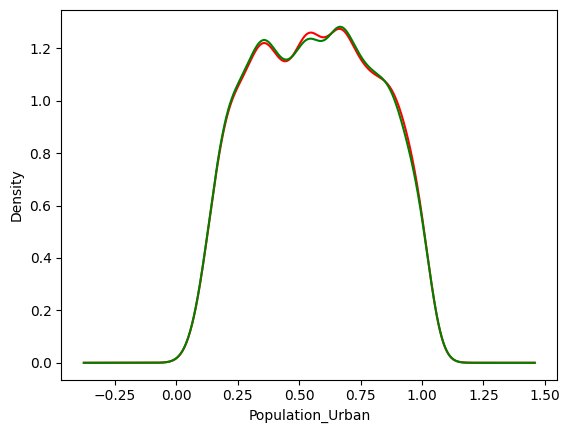

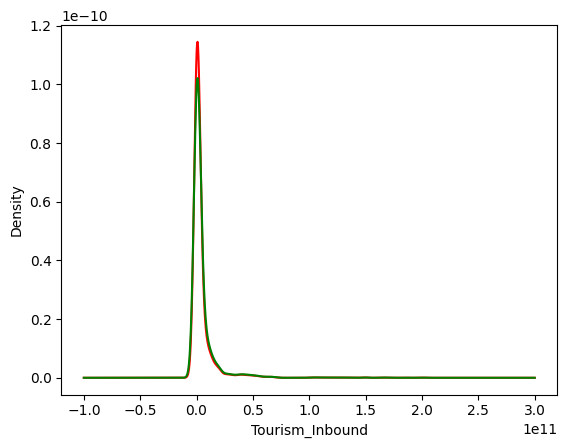

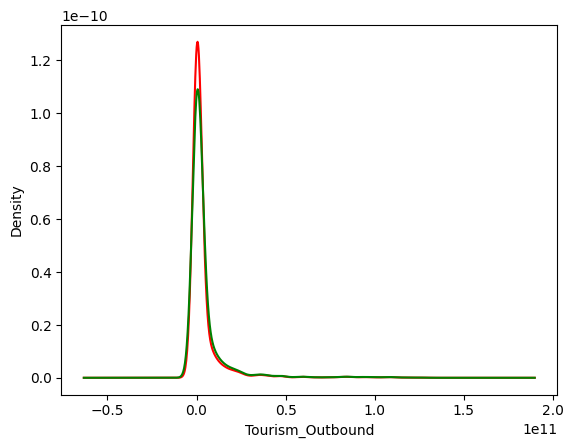

In [ ]:
for col in data.columns:
  trans_df[col].plot(kind='kde',color='red')
  data[col].plot(kind='kde',color='green')
  plt.xlabel(col)
  plt.show()

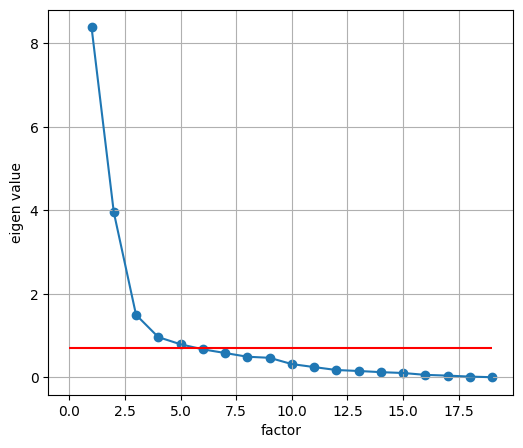

In [ ]:
# factor analyser
fa=FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(trans_df)

ev , v=fa.get_eigenvalues()
plt.figure(figsize=(6,5))
plt.scatter(range(1,trans_df.shape[1]+1),ev)
plt.plot(range(1,trans_df.shape[1]+1),ev)
plt.hlines(0.7,0,trans_df.shape[1],color='r')
plt.xlabel('factor')
plt.ylabel('eigen value')
plt.grid()
plt.show()

In [ ]:
x=fa.loadings_
df=pd.DataFrame(x.T,columns=trans_df.columns)


<Axes: >

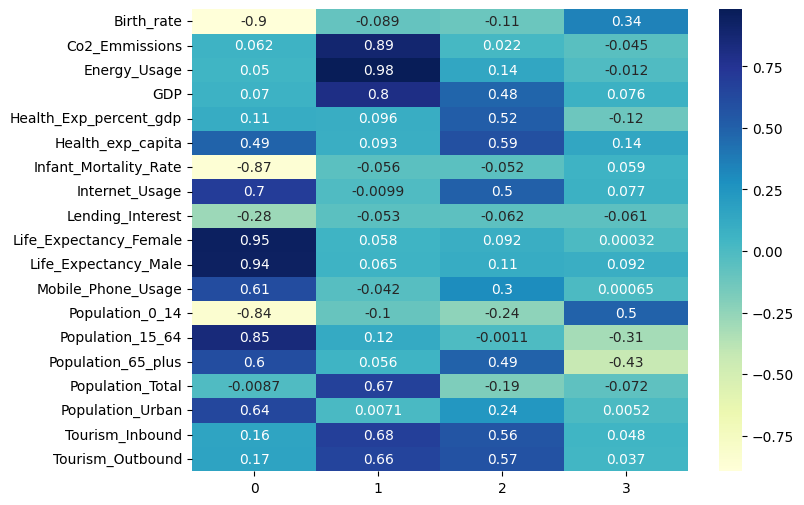

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.T, annot=True, cmap="YlGnBu")

In [ ]:
#factor 1 indicates the Health situation
col_0=[]
for i in df.columns:
  if (abs(df[i][0]) > 0.7):
    col_0.append(i)
    print(i)

Birth_rate
Infant_Mortality_Rate
Life_Expectancy_Female
Life_Expectancy_Male
Population_0_14
Population_15_64


In [ ]:
#factor 2 indicates the economic development
col_1=[]
for i in df.columns:
  if (abs(df[i][1]) > 0.7):
    col_1.append(i)
    print(i)

Co2_Emmissions
Energy_Usage
GDP


In [ ]:
slice_data=pd.DataFrame(columns=col_1)
for i in col_1:
  slice_data[i]=trans_df[i]



In [ ]:
std=StandardScaler()
std=std.fit_transform(trans_df)
std

array([[-0.20613219, -0.05004269, -0.13684731, ...,  0.13955363,
        -0.3326387 , -0.31108765],
       [ 2.45991425, -0.19295588, -0.22830199, ..., -0.97836917,
        -0.33788949, -0.31494931],
       [ 1.83783675, -0.20740417, -0.25417326, ..., -0.73852392,
        -0.33456914, -0.32283695],
       ...,
       [-0.65047326, -0.20928673, -0.16336209, ...,  1.5582993 ,
        -0.16893766, -0.24248156],
       [-0.20613219, -0.0696508 , -0.16550552, ...,  1.31845404,
        -0.27071029, -0.06385925],
       [-1.00594612, -0.21010495, -0.26312409, ...,  1.56236447,
        -0.33453825, -0.32622207]])

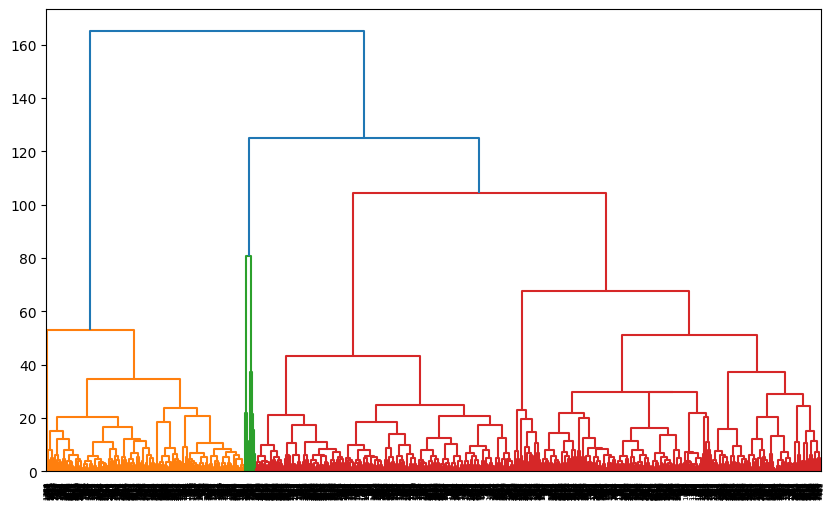

In [ ]:
plt.figure(figsize=(10,6))
dend=sch.dendrogram(sch.linkage(std,method='ward'))

In [ ]:
std=StandardScaler()
std=std.fit_transform(slice_data)
std

array([[-0.05004269, -0.13684731, -0.17497405],
       [-0.19295588, -0.22830199, -0.21698101],
       [-0.20740417, -0.25417326, -0.22320975],
       ...,
       [-0.20928673, -0.16336209, -0.17937683],
       [-0.0696508 , -0.16550552,  0.12539766],
       [-0.21010495, -0.26312409, -0.22490899]])

In [ ]:
met={'euclidean', 'yule', 'braycurtis', 'dice', 'chebyshev',
       'jaccard', 'canberra', 'russellrao', 'l2',
      'manhattan', 'rogerstanimoto',
     'cityblock', 'l1', 'haversine', 'sqeuclidean', 'hamming', 'cosine',
     'sokalsneath', 'sokalmichener', 'kulsinski'}

In [ ]:
score=0
for met in met:
  hc=AgglomerativeClustering(n_clusters=3,metric=met,linkage='single')
  y_hc=hc.fit_predict(std)
  y=silhouette_score(std,y_hc)
  if(score<y):
    score=y
    print("for {} metrics ".format(met)+" "+"sil score is {} ".format(silhouette_score(std,y_hc)))

for manhattan metrics  sil score is 0.9466805137998254 


In [ ]:
linkage = [ 'complete', 'average', 'single']
met=['euclidean','manhattan','l1']
score=0
for met in met:
  for link in linkage:
    hc=AgglomerativeClustering(n_clusters=3,metric=met,linkage=link)
    y_hc=hc.fit_predict(std)
    y=silhouette_score(std,y_hc)
    if(score<y):
     score=y
     print(link)
     print("for {} metrics ".format(met)+" "+"sil score is {} ".format(silhouette_score(std,y_hc)))

complete
for euclidean metrics  sil score is 0.9586065308441883 
average
for euclidean metrics  sil score is 0.9639004332986588 
complete
for manhattan metrics  sil score is 0.9648164390030098 


In [ ]:
score=0
for clus in range(2,10):
  hc=AgglomerativeClustering(n_clusters=clus,metric='manhattan',linkage='single')
  y_hc=hc.fit_predict(std)
  y=silhouette_score(std,y_hc)
  if(score<y):
    score=y
  print("for {} cluster ".format(clus)+" "+"sil score is {} ".format(silhouette_score(std,y_hc)))

for 2 cluster  sil score is 0.9532908654456425 
for 3 cluster  sil score is 0.9466805137998254 
for 4 cluster  sil score is 0.9561916998169046 
for 5 cluster  sil score is 0.959422558881984 
for 6 cluster  sil score is 0.9300269777668814 
for 7 cluster  sil score is 0.9288540769470865 
for 8 cluster  sil score is 0.9272758188696183 
for 9 cluster  sil score is 0.9063648071534227 


In [ ]:
score=0
for clus in range(2,10):
  hc=AgglomerativeClustering(n_clusters=clus,metric='euclidean',linkage='complete')
  y_hc=hc.fit_predict(std)
  y=silhouette_score(std,y_hc)
  if(score<y):
    score=y
  print("for {} cluster ".format(clus)+" "+"sil score is {} ".format(silhouette_score(std,y_hc)))

for 2 cluster  sil score is 0.9644283223706339 
for 3 cluster  sil score is 0.9586065308441883 
for 4 cluster  sil score is 0.959369621470952 
for 5 cluster  sil score is 0.939981496726315 
for 6 cluster  sil score is 0.9401213318687961 
for 7 cluster  sil score is 0.9087753296703095 
for 8 cluster  sil score is 0.9085283777667125 
for 9 cluster  sil score is 0.8955254684208148 


In [ ]:
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')
y_hc=hc.fit_predict(std)

In [ ]:
temp=trans_df.copy()
temp['cluster']=y_hc
temp['cluster'].value_counts()

1    2679
0      14
2      11
Name: cluster, dtype: int64

In [ ]:
temp.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
0,0.013643,4.459633e+06,2.285000e+06,1.287963e+13,0.153286,6489.285714,0.007143,0.635714,0.054571,79.928571,75.071429,0.714286,0.202429,0.674071,0.123429,3.730411e+08,0.779857,1.345516e+11,1.008108e+11
1,0.022406,6.985479e+04,3.753463e+04,1.682199e+11,0.063657,943.467115,0.031650,0.247100,0.133797,71.567675,66.832027,0.579507,0.301021,0.624925,0.074054,2.445402e+07,0.564120,3.616602e+09,3.370778e+09
2,0.012364,5.673742e+06,1.759300e+06,2.859653e+12,0.047182,101.909091,0.021000,0.127273,0.057818,75.181818,72.545455,0.327273,0.211273,0.712273,0.076455,1.302329e+09,0.425000,3.195855e+10,2.892391e+10


KMEANS

In [ ]:
algorithm : {"lloyd", "elkan", "auto", "full"}
wss=[]
for i in range(2,11):
  k_means=KMeans(n_clusters=i, init='k-means++', n_init='auto', max_iter=300, tol=0.002, copy_x=False, algorithm='elkan')
  k_means.fit(std)
  wss.append(k_means.inertia_)
  print(silhouette_score(std,k_means.labels_))

0.9663199576321981
0.887120799228423
0.8785300304965412
0.8548302207016516
0.8420304753965185
0.8751625125910908
0.7920308404804154
0.8001722066915753
0.7847684836913271


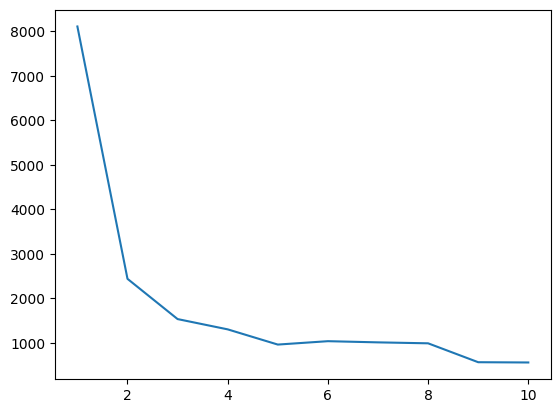

In [ ]:
wss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters=i,init='random',n_init='auto',algorithm='lloyd')
  k_means.fit(std)
  wss.append(k_means.inertia_)
  #print(silhouette_score(std,k_means.labels_))
plt.plot(range(1,11),wss)

DBSCAN

In [ ]:
epsl=[0.9,1,2,3,4]
score=0
for ep in epsl:
  for sample in range(2,12):
    dbscan=DBSCAN(eps=ep, min_samples=sample, metric='minkowski', metric_params=None, algorithm='auto', leaf_size=30, p=3, n_jobs=None)
    dbscan.fit(std)
    if(score < silhouette_score(std,dbscan.labels_)):
      score=silhouette_score(std,dbscan.labels_)
      print(str("for eps {} ".format(ep))+str("and  min_sample {} ".format(sample))+" silhouette score is {}" .format(silhouette_score(std,dbscan.labels_)))

for eps 0.9 and  min_sample 2  silhouette score is 0.8886369852259981
for eps 0.9 and  min_sample 3  silhouette score is 0.8915041779606566
for eps 1 and  min_sample 3  silhouette score is 0.8919531578086206
for eps 2 and  min_sample 3  silhouette score is 0.9496601494730064
for eps 2 and  min_sample 5  silhouette score is 0.9539149641779875
for eps 2 and  min_sample 8  silhouette score is 0.9545080805248435
for eps 2 and  min_sample 10  silhouette score is 0.9606115138261598
for eps 3 and  min_sample 3  silhouette score is 0.9613373673168887
for eps 4 and  min_sample 8  silhouette score is 0.9635037775664482


try with cluster number 4

In [ ]:
dbscan=DBSCAN(eps=2, min_samples=8, metric='minkowski', metric_params=None, algorithm='auto', leaf_size=30, p=3, n_jobs=None)
dbscan.fit(std)

DBSCAN(eps=2, metric='minkowski', min_samples=8, p=3)

In [ ]:
temp=trans_df.copy()
temp['cluster']=dbscan.labels_

In [ ]:
temp['cluster'].value_counts()

 0    2676
-1      19
 1       9
Name: cluster, dtype: int64

In [ ]:
temp.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
-1,0.013053,3.898516e+06,1.705741e+06,5.446624e+12,0.071474,1572.210526,0.017737,0.273684,0.061895,76.000000,72.315789,0.521053,0.207947,0.701895,0.090000,1.030376e+09,0.523842,5.837400e+10,5.153137e+10
0,0.022414,6.987944e+04,3.701570e+04,1.639188e+11,0.063671,944.081241,0.031660,0.247003,0.133855,71.565321,66.831465,0.579073,0.301123,0.624841,0.074037,2.346694e+07,0.564166,3.587172e+09,3.314415e+09
1,0.013889,5.657536e+06,2.270498e+06,1.336661e+13,0.162333,7031.777778,0.006778,0.677778,0.052333,80.333333,75.222222,0.733333,0.204000,0.670889,0.125222,2.984287e+08,0.801000,1.350852e+11,1.012620e+11


In [ ]:
temp['Birth_rate'].describe().T

count    2704.000000
mean        0.022320
std         0.011255
min         0.007000
25%         0.013000
50%         0.019000
75%         0.030000
max         0.053000
Name: Birth_rate, dtype: float64

# **outlier analysis**

In [ ]:
for col in slice_data.columns:
  q1=trans_df[col].quantile(q=0.25)
  q3=trans_df[col].quantile(q=0.75)
  iqr=q3-q1
  upp_bound=q3+iqr*1.5
  low_bound=q1-iqr*1.5
  print(col +" "+str(len(trans_df[trans_df[col]>upp_bound])))

Co2_Emmissions 325
Energy_Usage 391
GDP 391


In [ ]:
q1=trans_df['GDP'].quantile(q=0.25)
q3=trans_df['GDP'].quantile(q=0.75)
iqr=q3-q1
Gupp_bound=q3+iqr*1.5
Glow_bound=q1-iqr*1.5

In [ ]:
print(Gupp_bound)

237747470413.75003


In [ ]:
q1=trans_df['Co2_Emmissions'].quantile(q=0.25)
q3=trans_df['Co2_Emmissions'].quantile(q=0.75)
iqr=q3-q1
upp_bound=q3+iqr*1.5
low_bound=q1-iqr*1.5
trans_df[trans_df['GDP']>Gupp_bound][trans_df['Co2_Emmissions']>upp_bound]

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
60,0.014,3405180.0,1161353.0,1.198475e+12,0.046,43.0,0.030,0.0,0.0590,74.0,71.0,0.1,0.256,0.675,0.069,1.262645e+09,0.359,1.731800e+10,1.416900e+10
63,0.026,1186663.0,457198.0,4.766091e+11,0.043,20.0,0.067,0.0,0.1230,63.0,61.0,0.0,0.342,0.614,0.044,1.042262e+09,0.277,3.598000e+09,3.686000e+09
65,0.009,1219589.0,518964.0,4.731199e+12,0.076,2834.0,0.003,0.3,0.0210,85.0,78.0,0.5,0.146,0.682,0.172,1.268700e+08,0.786,5.970000e+09,4.264300e+10
68,0.013,447561.0,188161.0,5.616330e+11,0.043,491.0,0.005,0.4,0.0850,80.0,72.0,0.6,0.210,0.717,0.073,4.700811e+07,0.796,8.527000e+09,7.945000e+09
101,0.013,365560.0,251981.0,1.326334e+12,0.101,2209.0,0.004,0.1,0.0670,83.0,75.0,0.5,0.189,0.650,0.160,6.091106e+07,0.759,3.853400e+10,2.670300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0.011,499137.0,250992.0,1.614072e+12,0.114,5273.0,0.005,0.8,0.0260,83.0,79.0,0.8,0.165,0.694,0.142,3.400527e+07,0.809,1.843800e+10,3.697500e+10
2270,0.020,443674.0,178924.0,1.051628e+12,0.063,603.0,0.014,0.3,0.0530,79.0,74.0,0.8,0.300,0.640,0.060,1.178864e+08,0.778,1.262800e+10,9.001000e+09
2284,0.013,5433057.0,2215504.0,1.495830e+13,0.177,8254.0,0.006,0.7,0.0330,81.0,76.0,0.9,0.198,0.671,0.131,3.093263e+08,0.808,1.646060e+11,1.103130e+11
2286,0.021,201747.0,75502.0,3.938016e+11,0.047,639.0,0.014,0.4,0.1830,77.0,71.0,1.0,0.295,0.649,0.056,2.904328e+07,0.888,7.940000e+08,2.238000e+09


lwts remove the outliers into separate file and check the model score

In [ ]:
q1=trans_df['GDP'].quantile(q=0.25)
q3=trans_df['GDP'].quantile(q=0.75)
iqr=q3-q1
upp_bound=q3+iqr*1.5
low_bound=q1-iqr*1.5
trans_df[trans_df['GDP']>upp_bound]


,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
60,0.014,3405180.0,1161353.0,1.198475e+12,0.0460,43.0,0.030,0.0,0.059,74.0,71.0,0.10,0.256,0.675,0.069,1.262645e+09,0.359,1.731800e+10,1.416900e+10
63,0.026,1186663.0,457198.0,4.766091e+11,0.0430,20.0,0.067,0.0,0.123,63.0,61.0,0.00,0.342,0.614,0.044,1.042262e+09,0.277,3.598000e+09,3.686000e+09
65,0.009,1219589.0,518964.0,4.731199e+12,0.0760,2834.0,0.003,0.3,0.021,85.0,78.0,0.50,0.146,0.682,0.172,1.268700e+08,0.786,5.970000e+09,4.264300e+10
67,0.018,76699.0,19717.0,3.634287e+11,0.0586,1336.6,0.045,0.2,0.225,69.0,61.0,0.52,0.260,0.681,0.059,2.284022e+07,0.594,7.978400e+09,8.045200e+09
68,0.013,447561.0,188161.0,5.616330e+11,0.0430,491.0,0.005,0.4,0.085,80.0,72.0,0.60,0.210,0.717,0.073,4.700811e+07,0.796,8.527000e+09,7.945000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,0.014,62168.2,32720.0,2.662593e+11,0.0720,1103.0,0.007,0.6,0.101,82.0,77.0,1.40,0.214,0.689,0.097,1.746481e+07,0.890,3.180000e+09,2.348000e+09
2671,0.019,77175.8,20852.2,3.703281e+11,0.0680,530.0,0.015,0.5,0.126,78.0,70.0,1.00,0.280,0.660,0.060,4.770443e+07,0.756,3.257000e+09,3.364000e+09
2686,0.019,77175.8,191924.0,1.186461e+12,0.0610,618.0,0.013,0.4,0.047,80.0,75.0,0.80,0.290,0.647,0.063,1.208475e+08,0.784,1.332000e+10,1.073500e+10
2700,0.013,77175.8,2132446.0,1.624460e+13,0.1790,8895.0,0.006,0.8,0.033,81.0,76.0,1.00,0.196,0.667,0.136,3.138737e+08,0.811,2.000920e+11,1.265730e+11


In [ ]:
trans_df['Country']=country

In [ ]:
Gdp_extrim_data=trans_df[trans_df['GDP']>upp_bound]

In [ ]:
Gdp_extrim_data=Gdp_extrim_data.reset_index(drop=True)

In [ ]:
Gdp_extrim_data

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.014,3405180.0,1161353.0,1.198475e+12,0.0460,43.0,0.030,0.0,0.059,74.0,71.0,0.10,0.256,0.675,0.069,1.262645e+09,0.359,1.731800e+10,1.416900e+10,China
1,0.026,1186663.0,457198.0,4.766091e+11,0.0430,20.0,0.067,0.0,0.123,63.0,61.0,0.00,0.342,0.614,0.044,1.042262e+09,0.277,3.598000e+09,3.686000e+09,India
2,0.009,1219589.0,518964.0,4.731199e+12,0.0760,2834.0,0.003,0.3,0.021,85.0,78.0,0.50,0.146,0.682,0.172,1.268700e+08,0.786,5.970000e+09,4.264300e+10,Japan
3,0.018,76699.0,19717.0,3.634287e+11,0.0586,1336.6,0.045,0.2,0.225,69.0,61.0,0.52,0.260,0.681,0.059,2.284022e+07,0.594,7.978400e+09,8.045200e+09,"Korea, Dem. Rep."
4,0.013,447561.0,188161.0,5.616330e+11,0.0430,491.0,0.005,0.4,0.085,80.0,72.0,0.60,0.210,0.717,0.073,4.700811e+07,0.796,8.527000e+09,7.945000e+09,"Korea, Rep."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.014,62168.2,32720.0,2.662593e+11,0.0720,1103.0,0.007,0.6,0.101,82.0,77.0,1.40,0.214,0.689,0.097,1.746481e+07,0.890,3.180000e+09,2.348000e+09,Chile
387,0.019,77175.8,20852.2,3.703281e+11,0.0680,530.0,0.015,0.5,0.126,78.0,70.0,1.00,0.280,0.660,0.060,4.770443e+07,0.756,3.257000e+09,3.364000e+09,Colombia
388,0.019,77175.8,191924.0,1.186461e+12,0.0610,618.0,0.013,0.4,0.047,80.0,75.0,0.80,0.290,0.647,0.063,1.208475e+08,0.784,1.332000e+10,1.073500e+10,Mexico
389,0.013,77175.8,2132446.0,1.624460e+13,0.1790,8895.0,0.006,0.8,0.033,81.0,76.0,1.00,0.196,0.667,0.136,3.138737e+08,0.811,2.000920e+11,1.265730e+11,United States


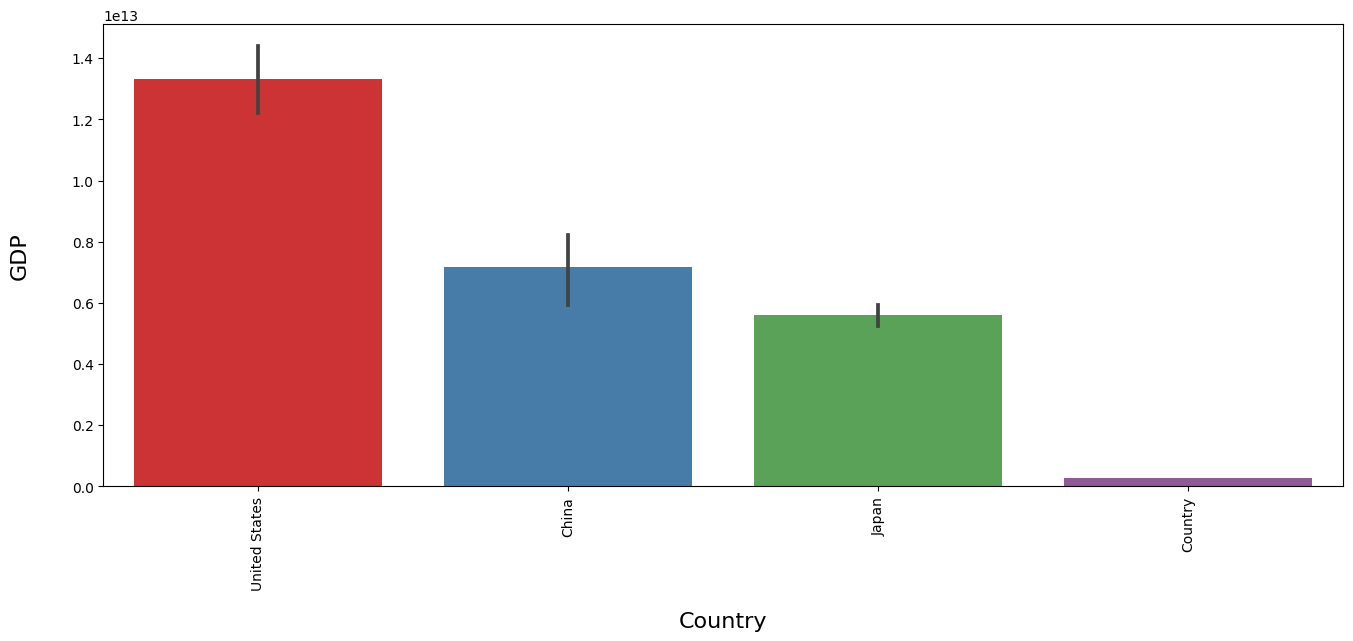

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = Gdp_extrim_data.sort_values('GDP',ascending=False).head(20)
mean = pd.DataFrame({'Country':['Country'], 'GDP':[data['GDP'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [ ]:
removed_outlier=trans_df[trans_df['GDP']<=upp_bound]

In [ ]:
removed_outlier=removed_outlier.reset_index(drop=True)
removed_outlier

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country
0,0.0200,87931.0,26998.0,5.479006e+10,0.0350,60.0,0.0340,0.00,0.1000,71.0,67.0,0.00,0.3420,0.6190,0.0390,31719449.0,0.599,1.020000e+08,1.930000e+08,Algeria
1,0.0500,9542.0,7499.0,9.129595e+09,0.0340,22.0,0.1280,0.00,1.0320,47.0,44.0,0.00,0.4760,0.4990,0.0250,13924930.0,0.324,3.400000e+07,1.460000e+08,Angola
2,0.0430,1617.0,1983.0,2.359122e+09,0.0430,15.0,0.0900,0.00,0.1102,57.0,53.0,0.00,0.4540,0.5170,0.0290,6949366.0,0.383,7.700000e+07,5.000000e+07,Benin
3,0.0270,4276.0,1836.0,5.788312e+09,0.0470,152.0,0.0540,0.00,0.1550,52.0,49.0,0.10,0.3830,0.5870,0.0290,1755375.0,0.532,2.270000e+08,2.090000e+08,Botswana
4,0.0460,1041.0,16080.6,2.610959e+09,0.0510,12.0,0.0960,0.00,0.1026,52.0,49.0,0.00,0.4680,0.5050,0.0280,11607944.0,0.178,2.300000e+07,3.000000e+07,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,0.0180,623.2,21303.2,5.012121e+09,0.0590,521.0,0.0210,0.30,0.1170,74.0,68.0,1.10,0.2780,0.6560,0.0660,534541.0,0.662,7.900000e+07,5.800000e+07,Suriname
2309,0.0150,864.0,22780.2,2.343634e+10,0.0540,972.0,0.0200,0.60,0.0770,74.0,66.0,1.40,0.2070,0.7050,0.0880,1337439.0,0.088,4.576000e+08,1.608000e+08,Trinidad and Tobago
2310,0.0114,156.2,69.2,2.859627e+09,0.0358,3497.8,0.0040,0.46,0.0650,83.2,77.4,0.42,0.2886,0.6386,0.0726,32427.0,0.911,5.296000e+08,1.256000e+08,Turks and Caicos Islands
2311,0.0150,584.4,21344.8,5.000435e+10,0.0890,1308.0,0.0100,0.50,0.1120,80.0,74.0,1.50,0.2200,0.6390,0.1400,3395253.0,0.948,2.222000e+09,1.028000e+09,Uruguay


# **GDP more countries**

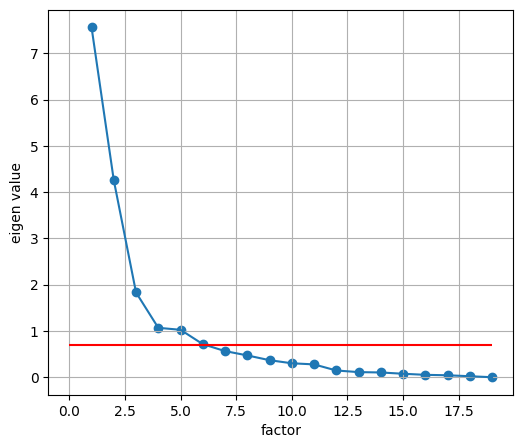

In [ ]:
# factor analyser
gdp_more=Gdp_extrim_data.drop(['Country'],axis=1)
fa=FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(gdp_more)

ev , v=fa.get_eigenvalues()
plt.figure(figsize=(6,5))
plt.scatter(range(1,gdp_more.shape[1]+1),ev)
plt.plot(range(1,gdp_more.shape[1]+1),ev)
plt.hlines(0.7,0,gdp_more.shape[1],color='r')
plt.xlabel('factor')
plt.ylabel('eigen value')
plt.grid()
plt.show()

<Axes: >

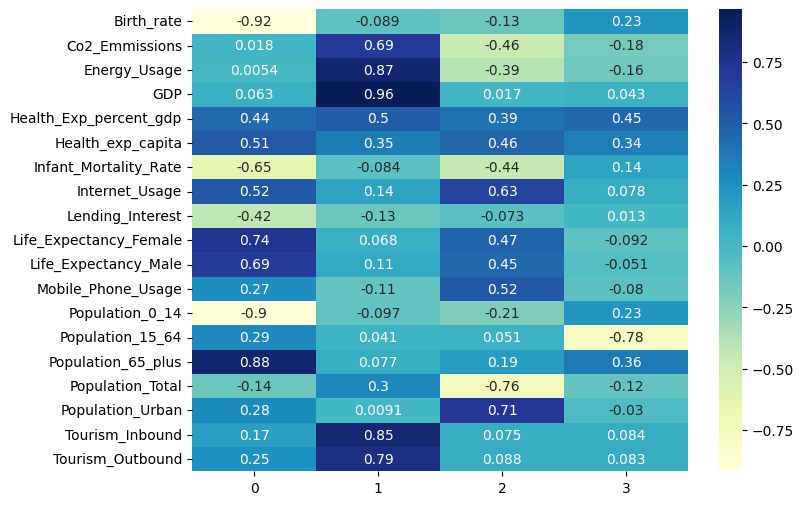

In [ ]:
x=fa.loadings_
df=pd.DataFrame(x.T,columns=gdp_more.columns)
plt.figure(figsize=(8,6))
sns.heatmap(df.T, annot=True, cmap="YlGnBu")

['GDP','Tourism_Inbound','Energy_Usage',"Tourism_Outbound","Population_Total"]

In [ ]:
std1=StandardScaler()
std1=std1.fit_transform(gdp_more)


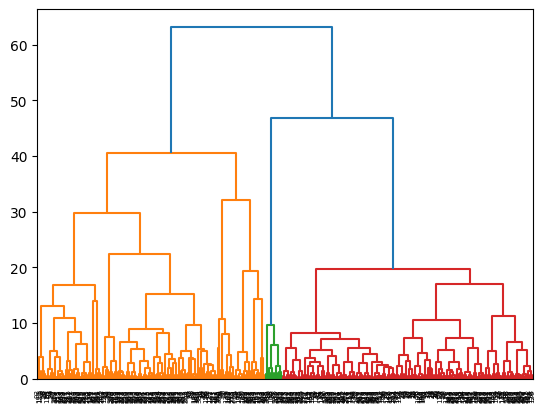

In [ ]:
dend=sch.dendrogram(sch.linkage(std1,method='ward'))

In [ ]:
col=[]
for i in df.columns:
  if (df[i][1] > 0.65):
    col.append(i)
    print(i)

Co2_Emmissions
Energy_Usage
GDP
Tourism_Inbound
Tourism_Outbound


In [ ]:
#df=Gdp_extrim_data[['Co2_Emmissions', 'Energy_Usage', 'GDP', 'Health_Exp_percent_gdp']]
df=Gdp_extrim_data[col]

In [ ]:
df.head()

,Co2_Emmissions,Energy_Usage,GDP,Tourism_Inbound,Tourism_Outbound
0,3405180.0,1161353.0,1.198475e+12,1.731800e+10,1.416900e+10
1,1186663.0,457198.0,4.766091e+11,3.598000e+09,3.686000e+09
2,1219589.0,518964.0,4.731199e+12,5.970000e+09,4.264300e+10
3,76699.0,19717.0,3.634287e+11,7.978400e+09,8.045200e+09
4,447561.0,188161.0,5.616330e+11,8.527000e+09,7.945000e+09


In [ ]:
std2=StandardScaler()
std2=std2.fit_transform(df)
std2

array([[ 2.09561517,  1.75019259, -0.11998157, -0.17411844, -0.33528487],
       [ 0.41007844,  0.3367905 , -0.40727956, -0.67542214, -0.76058191],
       [ 0.43509425,  0.46076916,  1.28602004, -0.5887536 ,  0.81991   ],
       ...,
       [-0.43286367, -0.19567583, -0.12476308, -0.32019804, -0.47460282],
       [-0.43286367,  3.69940104,  5.8682805 ,  6.50410914,  4.22496392],
       [-0.43286367, -0.53898507, -0.44521748, -0.77385597, -0.78021787]])

In [ ]:
met={'euclidean', 'yule', 'braycurtis', 'dice', 'chebyshev',
       'jaccard', 'canberra', 'russellrao', 'l2',
      'manhattan', 'rogerstanimoto',
     'cityblock', 'l1', 'haversine', 'sqeuclidean', 'hamming', 'cosine',
     'sokalsneath', 'sokalmichener', 'kulsinski'}
score=0
for met in met:
  hc=AgglomerativeClustering(n_clusters=2,metric=met,linkage='single')
  y_hc=hc.fit_predict(std2)
  y=silhouette_score(std2,y_hc)
  if(score<y):
    score=y
    print("for {} metrics ".format(met)+" "+"sil score is {} ".format(silhouette_score(std2,y_hc)))

for manhattan metrics  sil score is 0.8167445597906151 


In [ ]:
linkage = [ 'complete', 'average', 'single']
met=['manhattan','braycurtis','chebyshev',]
score=0
for met in met:
  for link in linkage:
    hc=AgglomerativeClustering(n_clusters=3,metric=met,linkage=link)
    y_hc=hc.fit_predict(std2)
    y=silhouette_score(std2,y_hc)
    if(score<y):
     score=y
     print(link)
     print("for {} metrics ".format(met)+" "+"sil score is {} ".format(silhouette_score(std2,y_hc)))

complete
for manhattan metrics  sil score is 0.740403325166189 
complete
for chebyshev metrics  sil score is 0.766786730350403 
average
for chebyshev metrics  sil score is 0.7745926509418531 


In [ ]:
score=0
for clus in range(2,10):
  hc=AgglomerativeClustering(n_clusters=clus,metric='manhattan',linkage='average')
  y_hc=hc.fit_predict(std2)
  y=silhouette_score(std2,y_hc)
  if(score<y):
    score=y
  print("for {} cluster ".format(clus)+" "+"sil score is {} ".format(silhouette_score(std2,y_hc)))

for 2 cluster  sil score is 0.8139266651250238 
for 3 cluster  sil score is 0.7397376382807773 
for 4 cluster  sil score is 0.7344274830397106 
for 5 cluster  sil score is 0.7385053175545484 
for 6 cluster  sil score is 0.6675500158132393 
for 7 cluster  sil score is 0.6262512362294047 
for 8 cluster  sil score is 0.5200707067782289 
for 9 cluster  sil score is 0.5172136348304313 


In [ ]:
Agg_1=AgglomerativeClustering(n_clusters=2,metric='manhattan',linkage='average')
y_hc=Agg_1.fit_predict(std2)

In [ ]:
temp2=Gdp_extrim_data.copy()
temp2['cluster']=y_hc

In [ ]:
temp2.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
0,0.013643,4.459633e+06,2.285000e+06,1.287963e+13,0.153286,6489.285714,0.007143,0.635714,0.054571,79.928571,75.071429,0.714286,0.202429,0.674071,0.123429,3.730411e+08,0.779857,1.345516e+11,1.008108e+11
1,0.014109,5.053281e+05,2.153026e+05,1.077353e+12,0.077771,2380.873740,0.012401,0.488117,0.092961,79.151194,73.663130,0.914748,0.207719,0.670695,0.121589,1.338744e+08,0.738218,1.790684e+10,1.952275e+10


In [ ]:
temp2[temp2['cluster']==1]['GDP']

0      1.198475e+12
1      4.766091e+11
2      4.731199e+12
3      3.634287e+11
4      5.616330e+11
           ...     
385    1.821445e+12
386    2.662593e+11
387    3.703281e+11
388    1.186461e+12
390    3.812862e+11
Name: GDP, Length: 377, dtype: float64

In [ ]:
temp2[temp2['cluster']==0]['GDP']

20     1.028970e+13
38     1.062530e+13
57     1.098020e+13
78     1.151220e+13
104    1.227700e+13
132    1.309540e+13
162    1.385790e+13
196    1.448030e+13
232    1.472030e+13
266    1.441790e+13
302    1.495830e+13
306    7.321892e+12
345    1.553380e+13
389    1.624460e+13
Name: GDP, dtype: float64

In [ ]:
temp2[temp2['cluster']==0]['Country']

20     United States
38     United States
57     United States
78     United States
104    United States
132    United States
162    United States
196    United States
232    United States
266    United States
302    United States
306            China
345    United States
389    United States
Name: Country, dtype: object

KMEANS

In [ ]:
wss=[]
for i in range(2,6):
  k_means=KMeans(n_clusters=i,init='random',n_init='auto')
  k_means.fit(std2)
  wss.append(k_means.inertia_)
  print(silhouette_score(std2,k_means.labels_))

0.8099735303139806
0.5625079805374226
0.5794588292375951
0.5638379520387287


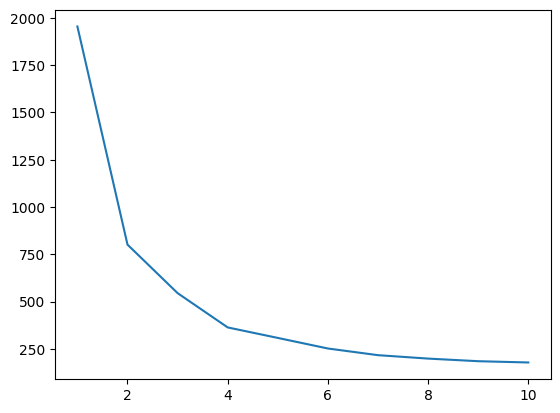

In [ ]:
wss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters=i,init='random',n_init='auto',algorithm='lloyd')
  k_means.fit(std2)
  wss.append(k_means.inertia_)
  #print(silhouette_score(std,k_means.labels_))
plt.plot(range(1,11),wss)

In [ ]:
k_means=KMeans(n_clusters=2,init='random',n_init='auto')
k_means.fit(std2)

KMeans(init='random', n_clusters=2, n_init='auto')

In [ ]:
temp2['cluster']=k_means.labels_
temp2.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
0,0.014143,4.002638e+05,1.845989e+05,1.030339e+12,0.078263,2417.098113,0.012329,0.492776,0.093505,79.204852,73.671159,0.922264,0.207987,0.669757,0.122259,1.146750e+08,0.742739,1.753063e+10,1.920731e+10
1,0.013150,5.222285e+06,2.233645e+06,1.021106e+13,0.121500,4584.800000,0.010050,0.505000,0.056000,78.700000,74.500000,0.635000,0.199050,0.690450,0.110450,6.574410e+08,0.683500,1.065370e+11,8.227590e+10


In [ ]:
temp2['cluster']=k_means.labels_
temp2.groupby('cluster').mean()


,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
0,0.014143,4.002638e+05,1.845989e+05,1.030339e+12,0.078263,2417.098113,0.012329,0.492776,0.093505,79.204852,73.671159,0.922264,0.207987,0.669757,0.122259,1.146750e+08,0.742739,1.753063e+10,1.920731e+10
1,0.013150,5.222285e+06,2.233645e+06,1.021106e+13,0.121500,4584.800000,0.010050,0.505000,0.056000,78.700000,74.500000,0.635000,0.199050,0.690450,0.110450,6.574410e+08,0.683500,1.065370e+11,8.227590e+10


DBSCAN

In [ ]:
epsl=[0.5,0.6,0.7,0.8,0.9,1,2,3,4]
score=0
for ep in epsl:
  for sample in range(2,12):
    dbscan=DBSCAN(eps=ep,min_samples=sample)
    dbscan.fit(std2)
    if(score < silhouette_score(std2,dbscan.labels_)):
      score=silhouette_score(std2,dbscan.labels_)
      print(str("for eps {} ".format(ep))+str("and  min_sample {} ".format(sample))+" silhouette score is {}" .format(silhouette_score(std2,dbscan.labels_)))

for eps 0.5 and  min_sample 2  silhouette score is 0.32279924805879223
for eps 0.5 and  min_sample 4  silhouette score is 0.33556786999973404
for eps 0.5 and  min_sample 6  silhouette score is 0.33968535959845864
for eps 0.5 and  min_sample 7  silhouette score is 0.42548725463102516
for eps 0.8 and  min_sample 2  silhouette score is 0.44889732813734945
for eps 0.9 and  min_sample 2  silhouette score is 0.46551431392737425
for eps 1 and  min_sample 2  silhouette score is 0.4687078727262438
for eps 2 and  min_sample 2  silhouette score is 0.7436125976098208
for eps 2 and  min_sample 3  silhouette score is 0.8080974126465663


In [ ]:
dbscan=DBSCAN(eps=2,min_samples=3)
dbscan.fit(std2)

DBSCAN(eps=2, min_samples=3)

In [ ]:
temp2['cluster']=dbscan.labels_

In [ ]:
temp2['cluster'].value_counts()

 0    377
 1     11
-1      3
Name: cluster, dtype: int64

In [ ]:
temp2[temp2['cluster']==-1]

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,...,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound,Country,cluster
306,0.012,47726.2,2727728.0,7.321892e+12,0.051,274.0,0.013,0.4,0.066,76.0,...,0.7,0.180,0.735,0.085,1.344130e+09,0.506,5.331300e+10,7.901000e+10,China,-1
345,0.013,77175.8,2191193.0,1.553380e+13,0.177,8467.0,0.006,0.7,0.033,81.0,...,0.9,0.197,0.669,0.133,3.115826e+08,0.809,1.845360e+11,1.173270e+11,United States,-1
389,0.013,77175.8,2132446.0,1.624460e+13,0.179,8895.0,0.006,0.8,0.033,81.0,...,1.0,0.196,0.667,0.136,3.138737e+08,0.811,2.000920e+11,1.265730e+11,United States,-1


# ***GDP == medium and less than that ***

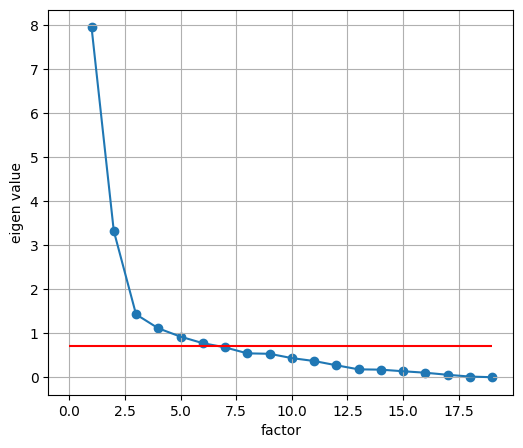

In [ ]:
# factor analyser
gdp_less=removed_outlier.drop('Country',axis=1)
fa=FactorAnalyzer(n_factors=2,rotation='varimax')
fa.fit(gdp_less)

ev , v=fa.get_eigenvalues()
plt.figure(figsize=(6,5))
plt.scatter(range(1,gdp_less.shape[1]+1),ev)
plt.plot(range(1,gdp_less.shape[1]+1),ev)
plt.hlines(0.7,0,gdp_less.shape[1],color='r')
plt.xlabel('factor')
plt.ylabel('eigen value')
plt.grid()
plt.show()

<Axes: >

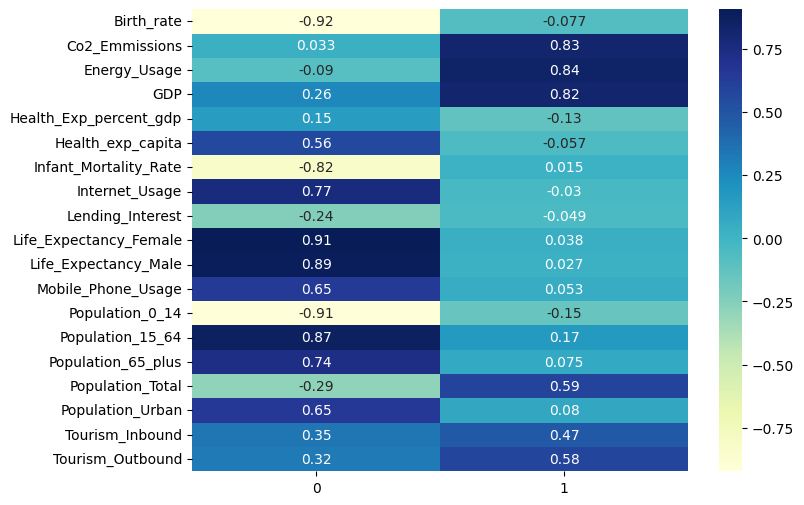

In [ ]:
x=fa.loadings_
df=pd.DataFrame(x.T,columns=gdp_less.columns)
plt.figure(figsize=(8,6))
sns.heatmap(df.T, annot=True, cmap="YlGnBu")

In [ ]:
std3=StandardScaler()
std3=std3.fit_transform(gdp_less)

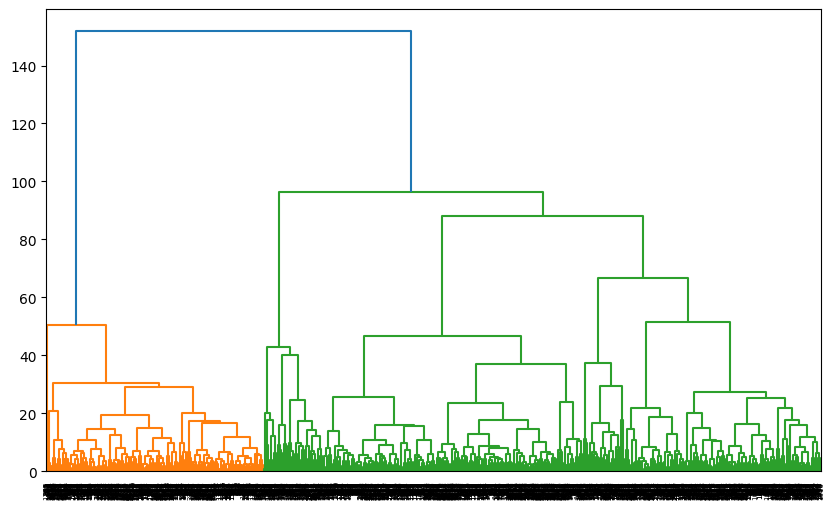

In [ ]:
plt.figure(figsize=(10,6))
dend=sch.dendrogram(sch.linkage(std3,method='ward'))

In [ ]:
col=[]
for i in df.columns:
  if (df[i][1] > 0.8):
    col.append(i)
    print(i)

Co2_Emmissions
Energy_Usage
GDP


In [ ]:
df_new=removed_outlier[col]

In [ ]:
#for i in removed_outlier.columns:
#  removed_outlier[i].plot(kind='kde')
#  plt.xlabel(i)
#  plt.show()

In [ ]:
std3=StandardScaler().fit_transform(df_new)

# **AGGLOMORATIVE**

In [ ]:
met={'euclidean', 'yule', 'braycurtis', 'dice', 'chebyshev',
       'jaccard', 'canberra', 'russellrao', 'l2',
      'manhattan', 'rogerstanimoto',
     'cityblock', 'l1', 'haversine', 'sqeuclidean', 'hamming', 'cosine',
     'sokalsneath', 'sokalmichener', 'kulsinski'}
score=0
for met in met:
  hc=AgglomerativeClustering(n_clusters=2,metric=met,linkage='single')
  y_hc=hc.fit_predict(std3)
  y=silhouette_score(std3,y_hc)
  if(score<y):
    score=y
    print("for {} metrics ".format(met)+" "+"sil score is {} ".format(silhouette_score(std3,y_hc)))

for manhattan metrics  sil score is 0.8091683606433262 


In [ ]:
linkage = [ 'complete', 'average', 'single']
met=['euclidean','canberra','braycurtis','chebyshev','manhattan']
score=0
for met in met:
  for link in linkage:
    hc=AgglomerativeClustering(n_clusters=3,metric=met,linkage=link)
    y_hc=hc.fit_predict(std3)
    y=silhouette_score(std3,y_hc)
    if(score<y):
     score=y
     print(link)
     print("for {} metrics ".format(met)+" "+"sil score is {} ".format(silhouette_score(std3,y_hc)))

complete
for euclidean metrics  sil score is 0.7085434020333258 
average
for euclidean metrics  sil score is 0.7296435095927472 
complete
for manhattan metrics  sil score is 0.730810551599289 
single
for manhattan metrics  sil score is 0.7983082237379713 


In [ ]:
score=0
for clus in range(2,10):
  hc=AgglomerativeClustering(n_clusters=clus,metric='euclidean',linkage='complete')
  y_hc=hc.fit_predict(std3)
  y=silhouette_score(std3,y_hc)
  if(score<y):
    score=y
  print("for {} cluster ".format(clus)+" "+"sil score is {} ".format(silhouette_score(std3,y_hc)))

for 2 cluster  sil score is 0.8178132380676767 
for 3 cluster  sil score is 0.7085434020333258 
for 4 cluster  sil score is 0.6753642702863666 
for 5 cluster  sil score is 0.6738246802235166 
for 6 cluster  sil score is 0.6690336145534531 
for 7 cluster  sil score is 0.6683147951393005 
for 8 cluster  sil score is 0.592996624975242 
for 9 cluster  sil score is 0.5911542996315177 


In [ ]:
Agg_2=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='complete')
y_hc=Agg_2.fit_predict(std3)

In [ ]:
temp3=removed_outlier.copy()
temp3['cluster']=y_hc

In [ ]:
temp3['cluster'].value_counts()

0    2285
1      28
Name: cluster, dtype: int64

In [ ]:
temp3.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
0,0.023794,21456.880438,15254.614705,3.156233e+10,0.061332,711.786871,0.034832,0.209129,0.139849,70.355711,65.771116,0.526407,0.316557,0.617316,0.066126,1.194179e+07,0.533919,1.400695e+09,8.305733e+08
1,0.016893,357659.964286,138631.857143,1.369706e+11,0.056929,165.964286,0.026964,0.053571,0.159921,69.785714,63.678571,0.300000,0.254143,0.663964,0.081964,7.429592e+07,0.629964,3.176879e+09,3.233571e+09


# **KMEANS**

In [ ]:
wss=[]
for i in range(2,6):
  k_means=KMeans(n_clusters=i,init='random',n_init='auto',algorithm='lloyd')
  k_means.fit(std3)
  wss.append(k_means.inertia_)
  print(silhouette_score(std3,k_means.labels_))

0.7180360298759765
0.6760799816904336
0.5947012784173671
0.49727070294392123


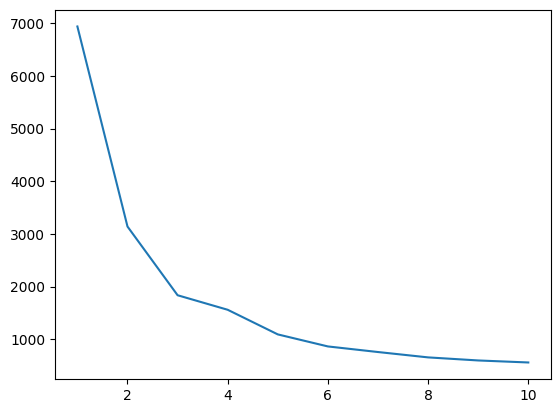

In [ ]:
wss=[]
for i in range(1,11):
  k_means=KMeans(n_clusters=i,init='random',n_init='auto',algorithm='lloyd')
  k_means.fit(std3)
  wss.append(k_means.inertia_)
  #print(silhouette_score(std,k_means.labels_))
plt.plot(range(1,11),wss)

In [ ]:
k_means=KMeans(n_clusters=2,init='random',n_init='auto',algorithm='lloyd')
k_means.fit(std3)

KMeans(init='random', n_clusters=2, n_init='auto')

In [ ]:
temp3['cluster']=k_means.labels_

In [ ]:
temp3['cluster'].value_counts()

1    1990
0     323
Name: cluster, dtype: int64

In [ ]:
temp3.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
0,0.018508,121696.450155,51403.183901,1.425911e+11,0.057451,875.341176,0.025687,0.270464,0.109693,74.928793,69.467492,0.686502,0.256901,0.659331,0.083768,4.031102e+07,0.647399,4.471915e+09,3.586648e+09
1,0.024555,9917.335377,11123.245327,1.502421e+10,0.061900,677.560201,0.036206,0.196985,0.145026,69.605427,65.141709,0.497236,0.325361,0.611153,0.063486,8.214484e+06,0.516851,9.271920e+08,4.170416e+08


# **DBSCAN**

In [ ]:
epsl=[0.8,0.9,1]
score=0
for ep in epsl:
  for sample in range(2,12):
    dbscan=DBSCAN(eps=ep,min_samples=sample)
    dbscan.fit(std3)
    if(score < silhouette_score(std3,dbscan.labels_)):
      score=silhouette_score(std3,dbscan.labels_)
      print(str("for eps {} ".format(ep))+str("and  min_sample {} ".format(sample))+" silhouette score is {}" .format(silhouette_score(std3,dbscan.labels_)))

for eps 0.8 and  min_sample 2  silhouette score is 0.6507140957792064
for eps 0.8 and  min_sample 3  silhouette score is 0.6710441123888039
for eps 0.8 and  min_sample 7  silhouette score is 0.7573067030471654
for eps 0.8 and  min_sample 9  silhouette score is 0.7737636080467689
for eps 0.8 and  min_sample 11  silhouette score is 0.7743359544698774
for eps 0.9 and  min_sample 9  silhouette score is 0.78770895684266
for eps 1 and  min_sample 11  silhouette score is 0.7930520758226257


In [ ]:
dbscan=DBSCAN(eps=1,min_samples=11)
dbscan.fit(std3)

DBSCAN(eps=1, min_samples=11)

In [ ]:
temp3['cluster']=dbscan.labels_

In [ ]:
temp3['cluster'].value_counts()

 0    2261
-1      52
Name: cluster, dtype: int64

In [ ]:
temp3.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
-1,0.021577,269967.576923,120220.942308,1.452556e+11,0.055769,164.192308,0.038192,0.090385,0.155250,67.307692,61.942308,0.361538,0.285269,0.640692,0.074135,8.111543e+07,0.565596,3.497604e+09,3.257738e+09
0,0.023759,19904.969836,14368.419991,3.025290e+10,0.061405,717.621406,0.034657,0.209934,0.139743,70.418753,65.833260,0.527395,0.316503,0.617356,0.066138,1.112308e+07,0.534380,1.374465e+09,8.045102e+08


# Logistics Reg and DTC

In [ ]:
Agg_1=AgglomerativeClustering(n_clusters=2,metric='manhattan',linkage='average')
y_hc=Agg_1.fit_predict(std2)
temp2=Gdp_extrim_data.copy()
temp2['cluster']=y_hc
temp2.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
0,0.013643,4.459633e+06,2.285000e+06,1.287963e+13,0.153286,6489.285714,0.007143,0.635714,0.054571,79.928571,75.071429,0.714286,0.202429,0.674071,0.123429,3.730411e+08,0.779857,1.345516e+11,1.008108e+11
1,0.014109,5.053281e+05,2.153026e+05,1.077353e+12,0.077771,2380.873740,0.012401,0.488117,0.092961,79.151194,73.663130,0.914748,0.207719,0.670695,0.121589,1.338744e+08,0.738218,1.790684e+10,1.952275e+10


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [ ]:
x=temp2.iloc[:,0:19]
y=temp2.iloc[:,20]
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#Logistic regression and fit the model
classifier_more_gdp = LogisticRegression(max_iter=1000)
classifier_more_gdp.fit(x,y)
y_pred=classifier_more_gdp.predict(x)

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.79      0.63        14
           1       0.99      0.97      0.98       377

    accuracy                           0.97       391
   macro avg       0.76      0.88      0.81       391
weighted avg       0.98      0.97      0.97       391



In [ ]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
dTree_model1 = DecisionTreeClassifier(criterion = 'gini',max_depth = 4, random_state=1)
dTree_model1.fit(x_train,y_train)
print(dTree_model1.score(x_train,y_train))
print(dTree_model1.score(x_test,y_test))

1.0
0.9873417721518988


In [ ]:
Agg_2=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='complete')
y_hc=Agg_2.fit_predict(std3)
temp3=removed_outlier.copy()
temp3['cluster']=y_hc
temp3.groupby('cluster').mean()

,Birth_rate,Co2_Emmissions,Energy_Usage,GDP,Health_Exp_percent_gdp,Health_exp_capita,Infant_Mortality_Rate,Internet_Usage,Lending_Interest,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0_14,Population_15_64,Population_65_plus,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
cluster,,,,,,,,,,,,,,,,,,,
0,0.023794,21456.880438,15254.614705,3.156233e+10,0.061332,711.786871,0.034832,0.209129,0.139849,70.355711,65.771116,0.526407,0.316557,0.617316,0.066126,1.194179e+07,0.533919,1.400695e+09,8.305733e+08
1,0.016893,357659.964286,138631.857143,1.369706e+11,0.056929,165.964286,0.026964,0.053571,0.159921,69.785714,63.678571,0.300000,0.254143,0.663964,0.081964,7.429592e+07,0.629964,3.176879e+09,3.233571e+09


In [ ]:
x1=temp3.iloc[:,0:19]
y1=temp3.iloc[:,20]
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#Logistic regression and fit the model
classifier_less_gdp = LogisticRegression(max_iter=1000)
classifier_less_gdp.fit(x1,y1)
y_pred=classifier_less_gdp.predict(x1)

print(classification_report(y1,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2285
           1       0.00      0.00      0.00        28

    accuracy                           0.99      2313
   macro avg       0.49      0.50      0.50      2313
weighted avg       0.98      0.99      0.98      2313



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,stratify=y1,random_state=42)
classifierDT_less_gdp = DecisionTreeClassifier(criterion = 'gini', random_state=1)
classifierDT_less_gdp.fit(x_train,y_train)
print(classifierDT_less_gdp.score(x_train,y_train))

print(classifierDT_less_gdp.score(x_test,y_test))
y_pred=classifierDT_less_gdp.predict(x1)
print(classification_report(y1,y_pred))

1.0
0.9956803455723542
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2285
           1       0.93      1.00      0.97        28

    accuracy                           1.00      2313
   macro avg       0.97      1.00      0.98      2313
weighted avg       1.00      1.00      1.00      2313



In [ ]:
import pickle

In [ ]:
pickle_out=open("Clustering_2_lessGdp_shub.pkl",mode="wb")
pickle.dump(classifierDT_less_gdp,pickle_out)
pickle_out.close()

In [ ]:
pickle_out=open("Clustering_1_moreGdp_shub.pkl",mode="wb")
pickle.dump(classifier_more_gdp,pickle_out)
pickle_out.close()